In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 폰트
plt.rc('font', family = 'AppleGothic')

# 그래프를 이미지로 저장할 때
cnt, PNG, UNDERBAR = 0, '.png', '_'
CHART_NAME = 'Histogram'

In [20]:
def FileSave():
    global cnt
    cnt +=1
    savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
    plt.savefig(savefile, dpi = 400)
    print(savefile + '파일이 저장되었습니다.')

# 단일 히스토그램

          giant       dwarf         man       woman
0    238.546060  124.103335  179.916746  159.490128
1    252.392501  137.276266  177.416055  172.558434
2    240.544939  130.792817  182.664450  145.299985
3    261.237121  132.296450  175.602169  159.458091
4    255.259860  133.228272  178.859996  163.211875
..          ...         ...         ...         ...
995  248.682492  134.647524  179.517798  165.736301
996  263.363421  116.168449  166.447602  154.842039
997  234.220693  114.580477  185.995531  162.115534
998  257.068424  136.411198  177.157406  157.741702
999  239.300300  146.445107  172.141760  157.686667

[1000 rows x 4 columns]
count    1000.000000
mean      180.016269
std        10.048471
min       140.185975
25%       173.108048
50%       180.149555
75%       186.748961
max       210.344273
Name: man, dtype: float64
Histogram_01.png파일이 저장되었습니다.


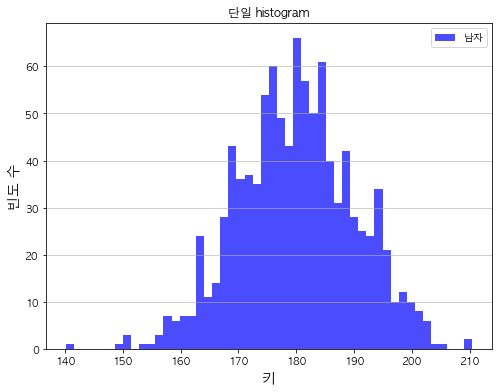

In [21]:
# data
num_bins = 50
human = pd.read_csv('../data/human_height.csv', encoding='utf-8')
print(human)

man = human['man']
woman = human['woman']
print(man.describe())


# histogram 그리기
fig1 = plt.figure(figsize=(8, 6))
# rwidth = 0.8 : 구간과 구간 사이의 간격이 보임
plt.hist(man, bins=num_bins, alpha=0.7, facecolor='blue', label="남자", rwidth=1)


plt.xlabel("키", size=14)
plt.ylabel("빈도 수", size=14)
plt.title("단일 histogram")
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.75)

# plt.show()
FileSave()

# 다중 히스토그램

          giant       dwarf         man       woman
0    238.546060  124.103335  179.916746  159.490128
1    252.392501  137.276266  177.416055  172.558434
2    240.544939  130.792817  182.664450  145.299985
3    261.237121  132.296450  175.602169  159.458091
4    255.259860  133.228272  178.859996  163.211875
..          ...         ...         ...         ...
995  248.682492  134.647524  179.517798  165.736301
996  263.363421  116.168449  166.447602  154.842039
997  234.220693  114.580477  185.995531  162.115534
998  257.068424  136.411198  177.157406  157.741702
999  239.300300  146.445107  172.141760  157.686667

[1000 rows x 4 columns]
count    1000.000000
mean      180.016269
std        10.048471
min       140.185975
25%       173.108048
50%       180.149555
75%       186.748961
max       210.344273
Name: man, dtype: float64
Histogram_02.png파일이 저장되었습니다.


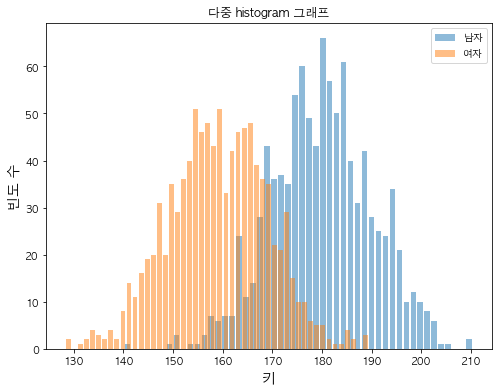

In [22]:
# data
num_bins = 50
human = pd.read_csv('../data/human_height.csv', encoding='utf-8')
print(human)

man = human['man']
woman = human['woman']
print(man.describe())


# draw histogram
fig2 = plt.figure(figsize=(8, 6))
# rwidth : default = 1
plt.hist(man, bins=num_bins, alpha=0.5, label="남자", rwidth = 0.8)
plt.hist(woman, bins=num_bins, alpha=0.5, label="여자", rwidth = 0.8)

plt.xlabel("키", size=14)
plt.ylabel("빈도 수", size=14)
plt.title("다중 histogram 그래프")
plt.legend(loc='upper right')

# plt.show()
FileSave()

# 히스토그램과 커널밀도함수 그리기

<class 'pandas.core.series.Series'>
mu : 19.785942622950824
sigma : 8.902411954856856
Histogram_03.png파일이 저장되었습니다.


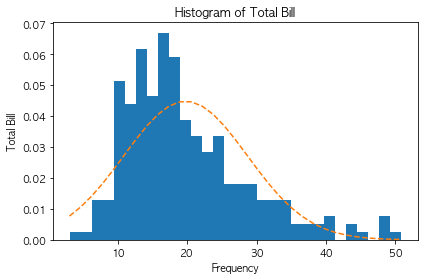

In [23]:
# data load
num_bins = 30 # bin의 개수

# data
tips = pd.read_csv('../data/tips.csv', encoding='utf-8')

x = tips['total_bill'] # Series
print(type(x))
# print('x')
# print(x)
# print('-'*30)


# 히스토그램 그리기
fig3, ax = plt.subplots()

# the histogram of the data
## density = True : 각 구간별로 count / sum(count)*np.diff(bins) => 전체 합 : 1
n, bins, patches = ax.hist(x, num_bins, density=True)

ax.set_title('Histogram of Total Bill')
ax.set_xlabel('Frequency')
ax.set_ylabel('Total Bill')


# 커널 밀도 함수 만들기 - 정규분포
mu = x.mean()  # 평균
print('mu :', mu)

sigma = x.std() # 표준 편차
print('sigma :', sigma)

# 정규 분포 값
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

ax.plot(bins, y, '--') # bins = bin edge

# Tweak spacing to prevent clipping of ylabel
fig3.tight_layout()

# plt.show()
FileSave()

# 히스토그램의 계급 구간의 개수 / 최소, 최대값 조정

Histogram_04.png파일이 저장되었습니다.


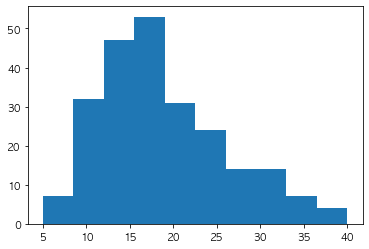

In [24]:
# data
tips = pd.read_csv('../data/tips.csv', encoding='utf-8')
x = tips['total_bill'] # Series

# 만약 최소값/최대값을 바꾸거나 계급 구간의 개수를 늘리고 싶다면 range와 bins를 통해 직접 설정할 수 있다.
fig4, ax = plt.subplots()
plt.hist(x, range=(5, 40), bins=10) # range : x축의 구간, bins 바꾸면서 조정 가능

# plt.show()
FileSave()

# 2개의 histogram을 각각의 figure로 넣기


#별개의 데이터에 대한 histogram 서브 플로팅
Histogram_05.png파일이 저장되었습니다.


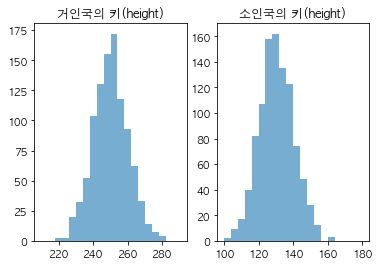

In [25]:
# data
humanfile = '../data/human_height.csv'
human = pd.read_csv(humanfile, encoding='utf-8')
giant = human['giant']
dwarf = human['dwarf']

# draw plot
print('\n#별개의 데이터에 대한 histogram 서브 플로팅')
fig5, axes = plt.subplots(nrows=1, ncols=2) # 1행 2열의 그래프

#range : x축의 범위
axes[0].hist(giant, range=(210, 290), bins=20, alpha=0.6)
axes[1].hist(dwarf, range=(100, 180), bins=20, alpha=0.6)

axes[0].set_title('거인국의 키(height)')
axes[1].set_title('소인국의 키(height)')


# plt.show()
FileSave()

# 2개의 historgram을 하나의 figure에 그리기


#2개의 histogram 같이 그리기
Histogram_06.png파일이 저장되었습니다.


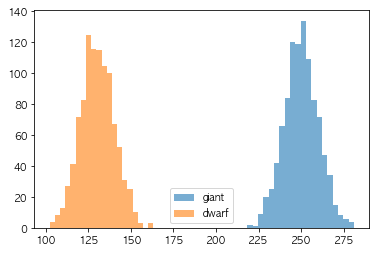

In [26]:
# data
humanfile = '../data/human_height.csv'
human = pd.read_csv(humanfile, encoding='utf-8')
giant = human['giant']
dwarf = human['dwarf']


# draw histogram
print('\n#2개의 histogram 같이 그리기')
fig6, axes = plt.subplots()

# 같은 축을 공유하는 histogram
axes.hist(giant, bins=20, alpha=0.6, label = 'giant')
axes.hist(dwarf, bins=20, alpha=0.6, label = 'dwarf')

plt.legend()
# plt.show()
FileSave()

# 누적 히스토그램

          giant       dwarf         man       woman
0    238.546060  124.103335  179.916746  159.490128
1    252.392501  137.276266  177.416055  172.558434
2    240.544939  130.792817  182.664450  145.299985
3    261.237121  132.296450  175.602169  159.458091
4    255.259860  133.228272  178.859996  163.211875
..          ...         ...         ...         ...
995  248.682492  134.647524  179.517798  165.736301
996  263.363421  116.168449  166.447602  154.842039
997  234.220693  114.580477  185.995531  162.115534
998  257.068424  136.411198  177.157406  157.741702
999  239.300300  146.445107  172.141760  157.686667

[1000 rows x 4 columns]
[[179.9167455 159.490128 ]
 [177.4160548 172.5584341]
 [182.6644495 145.2999849]
 ...
 [185.9955305 162.1155336]
 [177.1574061 157.7417022]
 [172.1417596 157.6866666]]
(1000, 2)

#stack histogram 그리기
Histogram_07.png파일이 저장되었습니다.


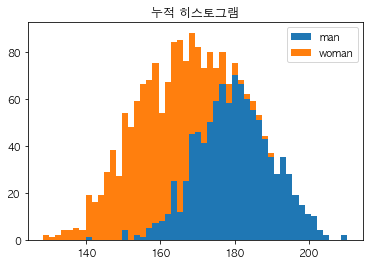

In [27]:
# data
num_bins = 50
human = pd.read_csv('../data/human_height.csv', encoding='utf-8')
print(human)

man = human['man']
woman = human['woman']
x = np.array([man, woman]).T
print(x)
print(x.shape) # (1000, 2)


# draw histogram
print('\n#stack histogram 그리기')
fig7, axes = plt.subplots()

# draw - stacked = True :: 겹쳐지게 그리는 것을 허용함
axes.hist(x, bins=num_bins, density=False, histtype='bar', stacked=True, label = ['man', 'woman'])
axes.set_title('누적 히스토그램')


plt.legend()

# plt.show()
FileSave()

In [28]:
from matplotlib.backends.backend_pdf import PdfPages

pdfsave = PdfPages(CHART_NAME + "_19011773.pdf")
pdfsave.savefig(fig1)
pdfsave.savefig(fig2)
pdfsave.savefig(fig3)
pdfsave.savefig(fig4)
pdfsave.savefig(fig5)
pdfsave.savefig(fig6)
pdfsave.savefig(fig7)
pdfsave.close()